# Importing the Libraries


In [1]:
from pathlib import Path as pth
import pandas as pd
import numpy as np

# Reading the datasets

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
meal_info = pd.read_csv('/content/meal_info.csv')
center_info = pd.read_csv('/content/fulfilment_center_info.csv')

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [5]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


# Exploratory Data Analysis

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [8]:
train['num_orders'].describe()

,num_orders
count,456548.000000
mean,261.872760
std,395.922798
min,13.000000
25%,54.000000
50%,136.000000
75%,324.000000
max,24299.000000


# Checking for null values


In [9]:
train.isnull().sum()

,0
id,0
week,0
center_id,0
meal_id,0
checkout_price,0
base_price,0
emailer_for_promotion,0
homepage_featured,0
num_orders,0


# Reading and merging .csv files
**Merging train.csv and meal_info.csv dataset by using common key id:**

We notice that meal_id column in train.csv is similar to meal_id in meal_info.csv dataset. Let us merge these two datasets, train.csv and meal_info.csv using common key meal_id and name the table as trainfinal.




In [10]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")

**Merging trainfinal.csv and center_info.csv dataset by using common key id:**

We notice that center_id column in trainfinal.csv is similar to center_id in center_info.csv dataset. Let us merge these two datasets, trainfinal.csv and center_info.csv using common key center_id and store it back in trainfinal. Display the first five rows of trainfinal using head().

In [11]:
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="outer")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1436842,1,10,1062,181.39,181.39,0,0,865,Beverages,Italian,590,56,TYPE_B,6.3
1,1205013,2,10,1062,183.36,182.36,0,0,782,Beverages,Italian,590,56,TYPE_B,6.3
2,1447751,3,10,1062,184.36,182.36,0,0,851,Beverages,Italian,590,56,TYPE_B,6.3
3,1014968,4,10,1062,182.36,183.36,0,0,1202,Beverages,Italian,590,56,TYPE_B,6.3
4,1003563,5,10,1062,183.39,181.39,0,0,958,Beverages,Italian,590,56,TYPE_B,6.3


# Dropping Columns
Let’s drop columns “center_id” and “meal_id” as they are not required for the further process. Display the changes of trainfinal table using head().



In [12]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1436842,1,181.39,181.39,0,0,865,Beverages,Italian,590,56,TYPE_B,6.3
1,1205013,2,183.36,182.36,0,0,782,Beverages,Italian,590,56,TYPE_B,6.3
2,1447751,3,184.36,182.36,0,0,851,Beverages,Italian,590,56,TYPE_B,6.3
3,1014968,4,182.36,183.36,0,0,1202,Beverages,Italian,590,56,TYPE_B,6.3
4,1003563,5,183.39,181.39,0,0,958,Beverages,Italian,590,56,TYPE_B,6.3


Display the list of columns present in trainfinal table and store it in variable “cols”




In [13]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


Rearrange the columns by slicing the columns of “cols” and print “cols”

In [14]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


Store the changes of columns in trainfinal and display the datatypes of trainfinal using trainfinal.dtypes. Here, we can see that, we not only have numerical data but we also have object data.

In [15]:
trainfinal = trainfinal[cols]
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1436842,1,590,56,TYPE_B,6.3,Beverages,Italian,181.39,181.39,0,0,865
1,1205013,2,590,56,TYPE_B,6.3,Beverages,Italian,183.36,182.36,0,0,782
2,1447751,3,590,56,TYPE_B,6.3,Beverages,Italian,184.36,182.36,0,0,851
3,1014968,4,590,56,TYPE_B,6.3,Beverages,Italian,182.36,183.36,0,0,1202
4,1003563,5,590,56,TYPE_B,6.3,Beverages,Italian,183.39,181.39,0,0,958


In [16]:
trainfinal.dtypes

,0
id,int64
week,int64
city_code,int64
region_code,int64
center_type,object
op_area,float64
category,object
cuisine,object
checkout_price,float64
base_price,float64


# Label Encoding
Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lb1=LabelEncoder()
trainfinal['center_type']=lb1.fit_transform(trainfinal['center_type'])

In [19]:
lb2=LabelEncoder()
trainfinal['category']=lb1.fit_transform(trainfinal['category'])

In [20]:
lb3=LabelEncoder()
trainfinal['cuisine']=lb1.fit_transform(trainfinal['cuisine'])

In [21]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1436842,1,590,56,1,6.3,0,2,181.39,181.39,0,0,865
1,1205013,2,590,56,1,6.3,0,2,183.36,182.36,0,0,782
2,1447751,3,590,56,1,6.3,0,2,184.36,182.36,0,0,851
3,1014968,4,590,56,1,6.3,0,2,182.36,183.36,0,0,1202
4,1003563,5,590,56,1,6.3,0,2,183.39,181.39,0,0,958


In [22]:
trainfinal.shape

(456548, 13)

# Data Visualization
Data visualization is where a given data set is presented in a graphical format. It helps the detection of patterns, trends, and correlations that might go undetected in text-based data.



In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'num_orders Distribution')

<Figure size 1200x700 with 0 Axes>

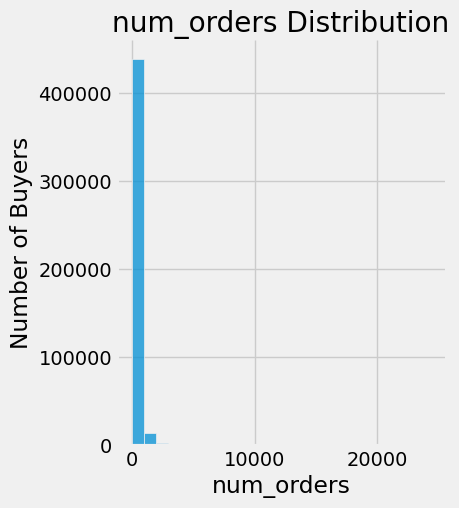

In [24]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 7))
sns.displot(trainfinal.num_orders, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

Drop the column “id” and find the correlation between the columns



In [25]:
trainfinal2 = trainfinal.drop(['id'], axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

# Correlation
Correlation is a statistical relationship between two variables and it could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable's value increases, the other variables' values decrease.

With the help of seaborn heatmap we will be plotting the heatmap and for finding the correlation between variable we have corr() availablec


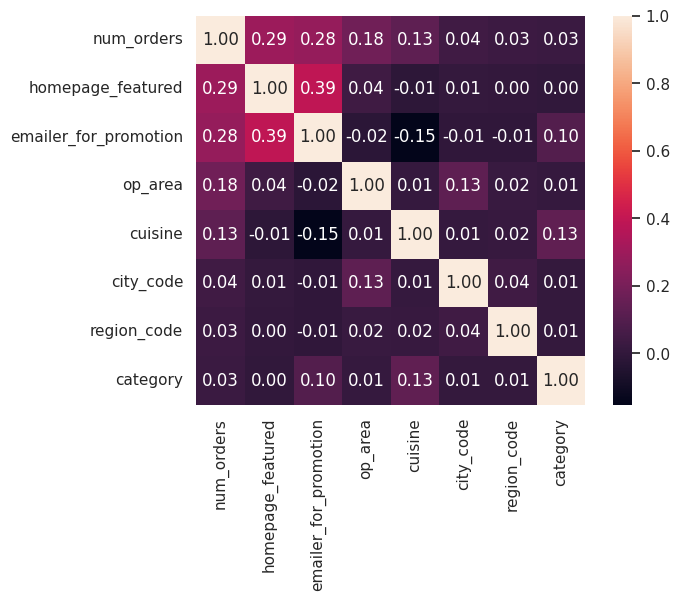

In [26]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale = 1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True,
                      fmt='.2f', yticklabels=columns.values,
                      xticklabels=columns.values)
plt.show()

# Splitting the Dataset into Dependent and Independent variable
In machine learning, the concept of dependent variables (y) and independent variables(x) is important to understand. Here, the Dependent variable is nothing but output in the dataset and the independent variable is all inputs in the dataset.
With this in mind, we need to split our dataset into the matrix of independent variables and the vector or dependent variable. Mathematically, a Vector is defined as a matrix that has just one column.

Let’s split our dataset into independent and dependent variables.
1. The independent variable in the dataset would be considered as 'x' and the 'homepage_featured', 'emailer_for_promotion', 'op_area', 'cuisine', 'city_code', 'region_code', and 'category' columns would be considered as the independent variable.

2. The dependent variable in the dataset would be considered as 'y' and the 'num_orders' column is considered as the dependent variable.
Now we will split the data into independent and dependent variables,


In [27]:
features = columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
X = trainfinal3.values
y = trainfinal['num_orders'].values

In [28]:
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,6.3,2,590,56,0
1,0,0,6.3,2,590,56,0
2,0,0,6.3,2,590,56,0
3,0,0,6.3,2,590,56,0
4,0,0,6.3,2,590,56,0


# Split the dataset into Train set and Test set
We will create 4 sets— X_train (training part of the matrix of features), X_val (test part of the matrix of features), Y_train (training part of the dependent variables associated with the X train sets, and therefore also the same indices), Y_val (test part of the dependent variables associated with the X val sets, and therefore also the same indices).

Now split our dataset into train set and test using train_test_split class from scikit learn library.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

**Model Building**

Model building includes the following main tasks


*   Train and test model algorithms
*   Evaluation of model

*   Save the model
*   Predicting the output using the model







# Train and Test Model Algorithms

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Model Evaluation
We’re going to use x_train and y_train obtained above in train_test_split section to train our regression model. We’re using the fit method and passing the parameters as shown below. Finally, we need to check to see how well our model is performing on the test data.

**Regression Evaluation Metrics**:

RMSE is the square root of the averaged squared difference between the target value and the value predicted by the model. It is preferred more in some cases because the errors are first squared before averaging which poses a high penalty on large errors. This implies that RMSE is useful when large errors are undesired.

In [31]:
#XGB Regression
XG = XGBRegressor()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 69.23981155528534


In [32]:
#Linear Regression
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.89054981605332


In [33]:
#Lasso Regression
L = Lasso()
L.fit(X_train, y_train)
y_pred = L.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.41597872932599


In [34]:
#Elastic Net Regression
EN = ElasticNet()
EN.fit(X_train, y_train)
y_pred = EN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))


RMSLE: 131.0942414487821


In [35]:
#Decision Tree Regression
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 62.584570796296504


In [36]:
#KNN
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 66.52359571460839


In [37]:
#Gradient Boosting
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
y_pred = GB.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 96.2904658979398


# Save the Model

In [38]:
import pickle
pickle.dump(DT,open('fdemand.pkl','wb'))

# Predicting the output using the model
Here, we are creating X_test which we are using to test the model to predict the number of orders by giving input to the model build.


In [39]:
testfinal = pd.merge(test, meal_info, on="meal_id", how="outer")
testfinal = pd.merge(testfinal, center_info, on="center_id", how="outer")
testfinal = testfinal.drop(['meal_id', 'center_id'], axis=1)

tcols = testfinal.columns.tolist()
tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols]

lb1 = LabelEncoder()
testfinal['center_type'] = lb1.fit_transform(testfinal['center_type'])
testfinal['category'] = lb1.fit_transform(testfinal['category'])
testfinal['cuisine'] = lb1.fit_transform(testfinal['cuisine'])

X_test = testfinal[features].values

In [40]:
testfinal.dtypes

,0
id,int64
week,int64
city_code,int64
region_code,int64
center_type,int64
op_area,float64
category,int64
cuisine,int64
checkout_price,float64
base_price,float64


In [41]:
pred = DT.predict(X_test)
pred[pred<0] = 0
submit = pd.DataFrame({
    'id' : testfinal['id'],
    'num_orders' : pred
})

Submit the predicted output values(Number of orders) to “submission.csv”

In [42]:
submit.to_csv("submission.csv", index=False)

In [43]:
submit.describe()

,id,num_orders
count,3.257300e+04,32573.000000
mean,1.248476e+06,262.834579
std,1.441580e+05,363.678365
min,1.000085e+06,15.287879
25%,1.123969e+06,64.178862
50%,1.247296e+06,148.053232
75%,1.372971e+06,321.307190
max,1.499996e+06,6392.000000
